In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('rcb').getOrCreate()

from pyspark.sql.functions import mean,min,max,col,round,mean,stddev

24/11/30 23:51:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/30 23:52:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #interactive data visualization
import joblib


satisfaction_df = pd.read_csv('satisfaction.csv')
df = satisfaction_df.copy()

In [152]:
satisfaction_df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                  579
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                       335
Online boarding                       86
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                     105
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             388
dtype: int64

### Columns with NaN values

Use their Mean value to fill NaN for Age,Food and drink, Online boarding, Baggage handling
Use their Mode value to fill NaN for Arrival Delay in Minutes

In [153]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [154]:
df['Food and drink'] = df['Food and drink'].fillna(df['Food and drink'].mean())

In [155]:
df['Online boarding'] = df['Online boarding'].fillna(df['Online boarding'].mean())

In [156]:
df['Baggage handling'] = df['Baggage handling'].fillna(df['Baggage handling'].mean())

In [157]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0])

In [158]:
df.isnull().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Removing 'id' column, belive it is not contributing to the prediction

In [159]:
df.drop('id',axis=1,inplace=True)

In [224]:
df.shape

(128577, 23)

### Handling Catagorical columns

In [161]:
# satisfaction_v2, Gender, Customer Type, Type of Travel, Class.
# non of the catagoricall colums has NaN vlalue
# All the catagorical columns values are Balanced

df['satisfaction_v2'] = df['satisfaction_v2'].map({'neutral or dissatisfied':0,'satisfied':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer':0,'Loyal Customer':1})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
df['Class'] = df['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

In [166]:
print(f'satisfaction_v2: {df["satisfaction_v2"].unique()}\nGender: {df["Gender"].unique()}\
        \nCustomer Type: {df["Customer Type"].unique()}\nType of Travel: {df["Type of Travel"].unique()}\nClass: {df["Class"].unique()} ')


satisfaction_v2: [0 1]
Gender: [0 1]        
Customer Type: [0 1]
Type of Travel: [0 1]
Class: [0 1 2] 


In [167]:
# Found no Object datatype in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128577 entries, 0 to 128576
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    128577 non-null  int64  
 1   Gender                             128577 non-null  int64  
 2   Customer Type                      128577 non-null  int64  
 3   Age                                128577 non-null  float64
 4   Type of Travel                     128577 non-null  int64  
 5   Class                              128577 non-null  int64  
 6   Flight Distance                    128577 non-null  int64  
 7   Inflight wifi service              128577 non-null  int64  
 8   Departure/Arrival time convenient  128577 non-null  int64  
 9   Ease of Online booking             128577 non-null  int64  
 10  Gate location                      128577 non-null  int64  
 11  Food and drink                     1285

In [168]:
X = df.drop(columns ='satisfaction_v2')

In [169]:
y = df['satisfaction_v2']

In [170]:
X.shape

(128577, 22)

In [171]:
y.shape

(128577,)

In [172]:
X = np.array(X)
y = np.array(y)

In [173]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [174]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [176]:
print(f'X_train: {X_test.shape}\nX_train: {X_train.shape}')

X_train: (32145, 22)
X_train: (96432, 22)


### XGBRegressor Model

In [187]:
import xgboost as xgb

model = xgb.XGBRegressor(objective = 'reg:squarederror',learning_rate = 0.1, max_depth = 14, n_estimators = 100)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [188]:
# predict the score of the trained model using test dataset

result = model.score(X_test,y_test)
print(f'Accuracy: {result}')

Accuracy: 0.8823597481589759


In [189]:
# Make prediction on the test data

y_predict = model.predict(X_test)

In [191]:
# Accuray Metrics

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)

print(f'RMSE: {RMSE}\nMSE: {MSE}\nMAE: {MAE}\nR2: {r2}\nAdjusted R2: {adj_r2}')


RMSE: 0.17
MSE: 0.028933245024416798
MAE: 0.06067828877751419
R2: 0.8823597481589759
Adjusted R2: 0.8822791776608593


### K-Nearest Neighbors Classifer Model

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     18128
           1       0.72      0.68      0.70     14017

    accuracy                           0.74     32145
   macro avg       0.74      0.74      0.74     32145
weighted avg       0.74      0.74      0.74     32145



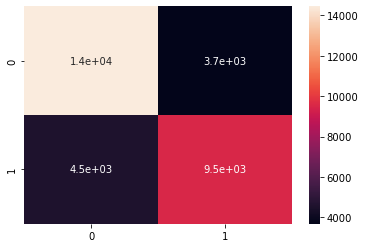

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)


knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)

y_predict_test = knn_model.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict_test))

### XGBoost Classifier

/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy 0.9625447192409395*100 % 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     18128
           1       0.97      0.95      0.96     14017

    accuracy                           0.96     32145
   macro avg       0.96      0.96      0.96     32145
weighted avg       0.96      0.96      0.96     32145

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...learning_rate=0.01, max_depth=3;, score=0.904 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...learning_rate=0.01, max_depth=3;, score=0.902 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...learning_rate=0.01, max_depth=3;, score=0.900 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...learning_rate=0.01, max_depth=3;, score=0.902 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...learning_rate=0.01, max_depth=3;, score=0.902 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...learning_rate=0.01, max_depth=4;, score=0.918 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...learning_rate=0.01, max_depth=4;, score=0.913 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...learning_rate=0.01, max_depth=4;, score=0.912 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...learning_rate=0.01, max_depth=4;, score=0.916 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...learning_rate=0.01, max_depth=4;, score=0.913 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...learning_rate=0.01, max_depth=5;, score=0.924 total time=   0.6s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...learning_rate=0.01, max_depth=5;, score=0.919 total time=   0.6s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...learning_rate=0.01, max_depth=5;, score=0.921 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...learning_rate=0.01, max_depth=5;, score=0.921 total time=   0.6s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...learning_rate=0.01, max_depth=5;, score=0.920 total time=   0.6s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ....learning_rate=0.5, max_depth=3;, score=0.960 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ....learning_rate=0.5, max_depth=3;, score=0.959 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ....learning_rate=0.5, max_depth=3;, score=0.960 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ....learning_rate=0.5, max_depth=3;, score=0.958 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ....learning_rate=0.5, max_depth=3;, score=0.959 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ....learning_rate=0.5, max_depth=4;, score=0.963 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ....learning_rate=0.5, max_depth=4;, score=0.960 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ....learning_rate=0.5, max_depth=4;, score=0.962 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ....learning_rate=0.5, max_depth=4;, score=0.961 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ....learning_rate=0.5, max_depth=4;, score=0.961 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ....learning_rate=0.5, max_depth=5;, score=0.963 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ....learning_rate=0.5, max_depth=5;, score=0.961 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ....learning_rate=0.5, max_depth=5;, score=0.962 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ....learning_rate=0.5, max_depth=5;, score=0.962 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ....learning_rate=0.5, max_depth=5;, score=0.962 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ......learning_rate=1, max_depth=3;, score=0.961 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ......learning_rate=1, max_depth=3;, score=0.957 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ......learning_rate=1, max_depth=3;, score=0.958 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ......learning_rate=1, max_depth=3;, score=0.958 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ......learning_rate=1, max_depth=3;, score=0.959 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ......learning_rate=1, max_depth=4;, score=0.959 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ......learning_rate=1, max_depth=4;, score=0.958 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ......learning_rate=1, max_depth=4;, score=0.960 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ......learning_rate=1, max_depth=4;, score=0.959 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ......learning_rate=1, max_depth=4;, score=0.958 total time=   0.4s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ......learning_rate=1, max_depth=5;, score=0.957 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ......learning_rate=1, max_depth=5;, score=0.957 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ......learning_rate=1, max_depth=5;, score=0.957 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ......learning_rate=1, max_depth=5;, score=0.957 total time=   0.6s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ......learning_rate=1, max_depth=5;, score=0.957 total time=   0.5s


/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:20:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "learniing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18128
           1       0.97      0.95      0.96     14017

    accuracy                           0.96     32145
   macro avg       0.96      0.96      0.96     32145
weighted avg       0.96      0.96      0.96     32145



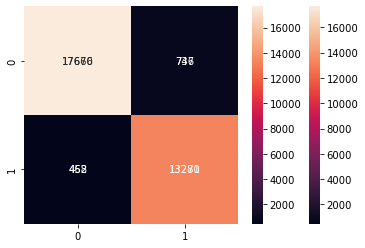

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(learniing_rate = 0.1, max_depth = 20, n_estimators = 500, use_label_encoder = False)
xgb_model.fit(X_train,y_train)

y_predict = xgb_model.predict(X_test)

print(f'Accuracy {accuracy_score(y_predict,y_test)}*100 % ')

cm = confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot = True, fmt = 'd')
print(classification_report(y_test,y_predict))


param_grid = {'learning_rate':[0.01,0.5,1], # regularization parameter
               'max_depth':[3,4,5]	 # depth of each tree
              }

xgb_model1 = xgb.XGBClassifier(learniing_rate = 0.01, max_depth = 20, n_estimators = 100, objective = 'binary:logistic')    

grid = GridSearchCV(xgb_model1,param_grid,refit = True, verbose = 4)
grid.fit(X_train,y_train)

y_predict_optim = grid.predict(X_test)
cm = confusion_matrix(y_predict_optim,y_test)
sns.heatmap(cm,annot = True,fmt = 'd')

print(classification_report(y_test,y_predict_optim))

### Observation
 - XGBoost Classifier model predicted 96% accuracy compared to K-Nearest Neighbors Classifer Model and XGBRegressor Model

In [203]:
import joblib

joblib.dump(xgb_model, 'satisfaction_xgb_model.pkl')

['satisfaction_xgb_model.pkl']

In [233]:
# Production data set
loaded_model = joblib.load('satisfaction_xgb_model.pkl')
prod_df = pd.read_csv('satisfaction_prod.csv')

In [235]:
prod_df.shape

(1303, 23)

In [234]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1303 non-null   int64  
 1   Gender                             1303 non-null   object 
 2   Customer Type                      1303 non-null   object 
 3   Age                                1295 non-null   float64
 4   Type of Travel                     1303 non-null   object 
 5   Class                              1303 non-null   object 
 6   Flight Distance                    1303 non-null   int64  
 7   Inflight wifi service              1303 non-null   int64  
 8   Ease of Online booking             1303 non-null   int64  
 9   Gate location                      1303 non-null   int64  
 10  Food and drink                     1303 non-null   int64  
 11  Online boarding                    1303 non-null   int64

In [243]:
prod_df['Gender'] = prod_df['Gender'].map({'Male':0,'Female':1})
prod_df['Customer Type'] = prod_df['Customer Type'].map({'disloyal Customer':0,'Loyal Customer':1})
prod_df['Type of Travel'] = prod_df['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
prod_df['Class'] = prod_df['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

In [244]:
prod_df.drop('id',axis=1,inplace=True)

In [246]:
predictions = loaded_model.predict(prod_df)
prod_df['predicted_label'] = predictions
output = 'satisfaction_prod_predictions.csv'
prod_df.to_csv(output,index = False)

#### satisfaction_prod_predictions.csv file with predicted value has been saved in this directory